In [1]:
import gym
import gym_maze
from utils import save_frames_as_gif, get_state_rep_func
from Agents.MCAgent import MCAgent
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

pygame 2.0.1 (SDL 2.0.14, Python 3.7.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


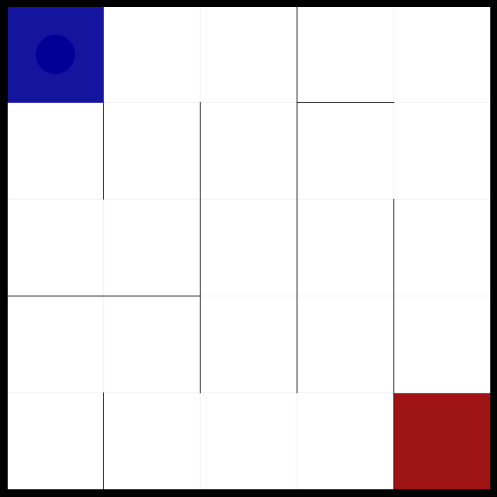

In [2]:
env = gym.make('maze-v0')
env.reset()
frame = env.render(mode='rgb_array')
save_frames_as_gif([frame], 1, 'initial_state.gif')

In [3]:
num_rows = env.observation_space.high.min() - env.observation_space.low.min() + 1
num_cols = num_rows
num_states = num_rows * num_cols
num_actions = env.action_space.n
    
def train(agent, env, num_episodes):
    for _ in range(num_episodes):
        observation = env.reset()
        episode = agent.generate_episode(env, observation)
        env.close()
        agent.policy_evaluation([episode])

def run_agent(agent, env, num_runs):
    total_reward = []
    for i in range(num_runs):
        agent.set_seed(i)
        done = False
        reward = 0
        o = env.reset()
        while not done:
            action = agent.step(o)
            o, r, done, _  = env.step(action)
            reward += r
        total_reward.append(reward)
        env.close()
    return np.round(total_reward,2)

In [4]:
epsilons = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
num_train_episodes = [30, 50, 70, 100, 300, 500, 700, 1000]
agents = {}
for eps in epsilons:
    for num_eps in num_train_episodes:
        agent = MCAgent(num_states, num_actions, get_state_rep_func((5,5)), eps, 1.0, int(eps*num_eps))
        train(agent, env, num_eps)
        agents[str(eps)+str(num_eps)] = agent
        print(f"Finished training. Epsilon {eps} Exp size {num_eps}")

Finished training. Epsilon 0.1 Exp size 30
Finished training. Epsilon 0.1 Exp size 50
Finished training. Epsilon 0.1 Exp size 70
Finished training. Epsilon 0.1 Exp size 100
Finished training. Epsilon 0.1 Exp size 300
Finished training. Epsilon 0.1 Exp size 500
Finished training. Epsilon 0.1 Exp size 700
Finished training. Epsilon 0.1 Exp size 1000
Finished training. Epsilon 0.2 Exp size 30
Finished training. Epsilon 0.2 Exp size 50
Finished training. Epsilon 0.2 Exp size 70
Finished training. Epsilon 0.2 Exp size 100
Finished training. Epsilon 0.2 Exp size 300
Finished training. Epsilon 0.2 Exp size 500
Finished training. Epsilon 0.2 Exp size 700
Finished training. Epsilon 0.2 Exp size 1000
Finished training. Epsilon 0.3 Exp size 30
Finished training. Epsilon 0.3 Exp size 50
Finished training. Epsilon 0.3 Exp size 70
Finished training. Epsilon 0.3 Exp size 100
Finished training. Epsilon 0.3 Exp size 300
Finished training. Epsilon 0.3 Exp size 500
Finished training. Epsilon 0.3 Exp size

In [5]:
num_runs = 1000
returns = []
for eps in epsilons:
    for num_eps in num_train_episodes:
        total_reward = run_agent(agents[str(eps)+str(num_eps)], env, num_runs)
        avg_return = np.round(sum(total_reward)/num_runs, 2)
        returns.append(avg_return)
        print(f"Return for {eps} and {num_eps}", avg_return)

Return for 0.1 and 30 0.3
Return for 0.1 and 50 -0.2
Return for 0.1 and 70 0.34
Return for 0.1 and 100 0.24
Return for 0.1 and 300 0.35
Return for 0.1 and 500 0.35
Return for 0.1 and 700 0.35
Return for 0.1 and 1000 0.35
Return for 0.2 and 30 0.67
Return for 0.2 and 50 0.63
Return for 0.2 and 70 0.56
Return for 0.2 and 100 0.64
Return for 0.2 and 300 0.7
Return for 0.2 and 500 0.7
Return for 0.2 and 700 0.7
Return for 0.2 and 1000 0.7
Return for 0.3 and 30 0.56
Return for 0.3 and 50 0.04
Return for 0.3 and 70 0.8
Return for 0.3 and 100 0.75
Return for 0.3 and 300 0.8
Return for 0.3 and 500 0.8
Return for 0.3 and 700 0.8
Return for 0.3 and 1000 0.8
Return for 0.4 and 30 0.56
Return for 0.4 and 50 -0.01
Return for 0.4 and 70 0.85
Return for 0.4 and 100 0.86
Return for 0.4 and 300 0.86
Return for 0.4 and 500 0.86
Return for 0.4 and 700 0.86
Return for 0.4 and 1000 0.86
Return for 0.5 and 30 -1.18
Return for 0.5 and 50 -1.41
Return for 0.5 and 70 0.64
Return for 0.5 and 100 0.79
Return for

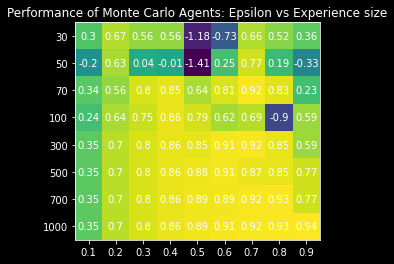

In [6]:
fig, ax = plt.subplots()

ax.set_xticks(np.arange(len(epsilons)))
ax.set_yticks(np.arange(len(num_train_episodes)))

ax.set_xticklabels(epsilons)
ax.set_yticklabels(num_train_episodes)

returns_ = np.reshape(returns, (len(num_train_episodes),len(epsilons)), order='F')
for i in range(len(epsilons)):
    for j in range(len(num_train_episodes)):
        text = ax.text(i, j, returns_[j][i], ha="center", va="center", color="w")

ax.set_title("Performance of Monte Carlo Agents: Epsilon vs Experience size")
ax.imshow(returns_, cmap='viridis', interpolation=None)
plt.show()

In [ ]:
def save_agent_trajectory(agents, agent_key, fname="mc_agent_movement.gif"):
    done = False
    total_reward = 0
    observation = env.reset()
    frames = []
    while not done:
        action = agents[agent_key].step(observation)
        observation, reward, done, info  = env.step(action)
        total_reward += reward
        frames.append(env.render(mode='rgb_array'))
    save_frames_as_gif(frames, 5, fname)
    env.close()

In [ ]:
save_agent_trajectory(agents, '0.270', "mc_agent_movement_low_eps_low_exp.gif")
save_agent_trajectory(agents, '0.91000', "mc_agent_movement_high_eps_high_exp.gif")